# Calculating the F-Fingerprint to compare crystal structures

The F-Fingerprint was introduced by Oganov and Valle in <a href="https://doi.org/10.1063/1.3079326" target="_blank">doi:10.1063/1.3079326</a> and <a href="https://doi.org/10.1107/S0108767310026395" target="_blank">doi:10.1107/S0108767310026395</a>.
The definition is based on the pair-wise partial radial distribution function.

First we create two crystals with <a href="https://wiki.fysik.dtu.dk/ase/" target="_blank">ase</a>:

In [1]:
from ase.spacegroup import crystal

### GaAs
a = 4.066 * 2.0
GaAs_prim = crystal(
    ("Ga", "As"),
    basis=((0.0, 0.0, 0.0), (0.75, 0.75, 0.75)),
    spacegroup=216,
    cellpar=[a, a, a, 90, 90, 90],
    primitive_cell=True,
)
GaAs_conv = crystal(
    ("Ga", "As"),
    basis=((0.0, 0.0, 0.0), (0.75, 0.75, 0.75)),
    spacegroup=216,
    cellpar=[a, a, a, 90, 90, 90],
    primitive_cell=False,
)

We have created two times the same materials, but using different unit cells. `GaAs_prim` is the crystal structure with the primitive unit cell and `GaAs_conv` is uses conventional unit cell. We can print the crystal structures to visualize them with e.g. <a href="https://jp-minerals.org/vesta/en/" target="_blank">VESTA</a>:

In [2]:
from ase.io import write

write("GaAs_prim.xsf", GaAs_prim)
write("GaAs_conv.xsf", GaAs_conv)

Now, to compare both structures (they should be identical), we import the FFingerPrint class and load the structures into the object.

In [3]:
from aim2dat.strct import StructureCollection

strct_collection = StructureCollection()
strct_collection.append_from_ase_atoms("GaAs 216 prim", GaAs_prim)
strct_collection.append_from_ase_atoms("GaAs 216 conv", GaAs_conv)

Now we can calculate the f-fingerprint and compare the elemental contributions:

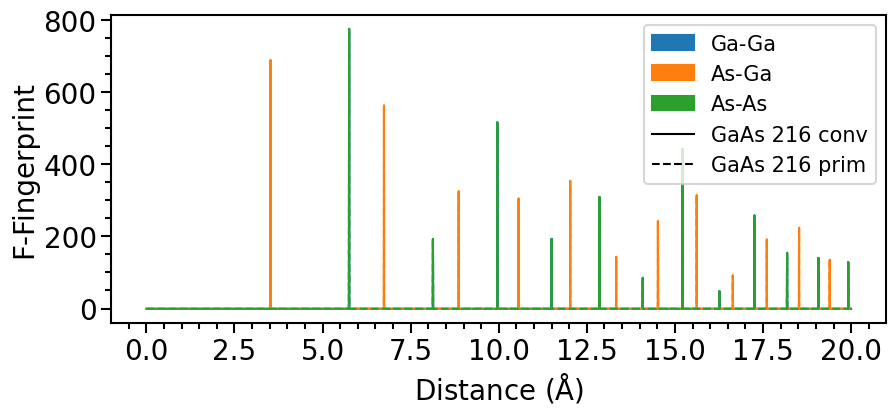

In [4]:
from aim2dat.plots import PartialRDFPlot

plot = PartialRDFPlot()
plot.ratio = (10, 4)
plot.show_legend = True
plot.y_label = "F-Fingerprint"
element_fingerprints, atomic_fingerprints = strct_collection[
    "GaAs 216 conv"
].calculate_ffingerprint()
plot.import_ffingerprint("GaAs 216 conv", **element_fingerprints, x_unit="ang")
element_fingerprints, atomic_fingerprints = strct_collection[
    "GaAs 216 prim"
].calculate_ffingerprint()
plot.import_ffingerprint("GaAs 216 prim", **element_fingerprints, x_unit="ang")
plot.plot(["GaAs 216 conv", "GaAs 216 prim"])

We can already see that both structures have the same fingerprints. 
Now we can also calculate the similarity of the two structures based on the cosine-distance:

In [5]:
from aim2dat.strct import StructureOperations

strct_op = StructureOperations(structures=strct_collection)
strct_op.compare_structures_via_ffingerprint("GaAs 216 prim", "GaAs 216 conv", use_weights=True)

1.1102230246251565e-16